/Users/tangxikai/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


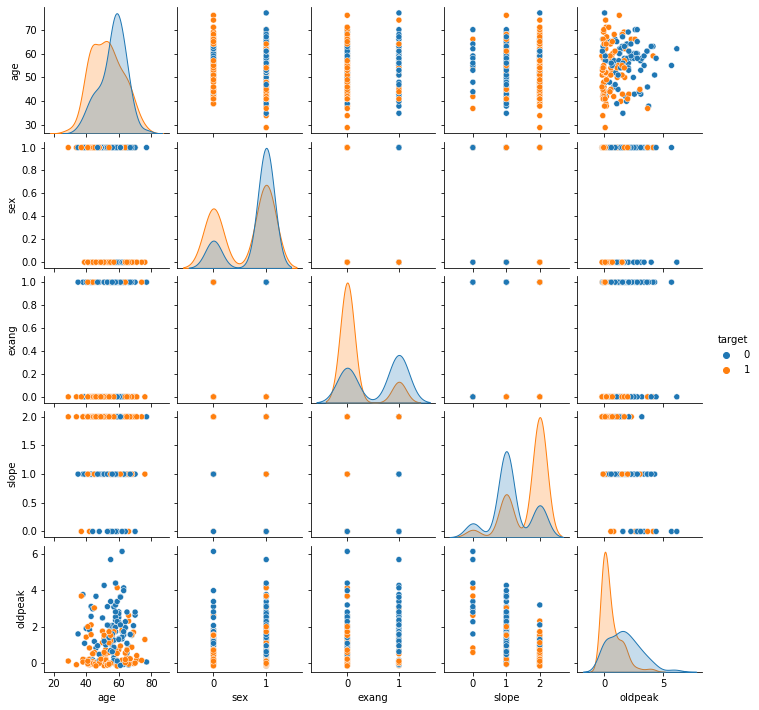

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heart_disease_missing = pd.read_csv(r"/Users/tangxikai/Desktop/heart_disease_missing.csv")
# 另一个有用的seaborn plot是pairplot，它显示了每一对特征之间的双变量关系
selected_heart_disease_missing = sns.pairplot(heart_disease_missing[['age','sex','exang','slope','oldpeak','target']], hue="target", size=2)

In [2]:
selected_heart_disease_missing = heart_disease_missing.loc[:, ['age','sex','exang','slope','oldpeak','target']]
selected_heart_disease_missing.corr()
#协方差Covariance

,age,sex,exang,slope,oldpeak,target
age,1.000000,-0.140074,0.114545,-0.117989,0.131735,-0.196967
sex,-0.140074,1.000000,0.122773,-0.057160,0.098912,-0.249428
exang,0.114545,0.122773,1.000000,-0.314675,0.279862,-0.450321
slope,-0.117989,-0.057160,-0.314675,1.000000,-0.652509,0.419238
oldpeak,0.131735,0.098912,0.279862,-0.652509,1.000000,-0.454241
target,-0.196967,-0.249428,-0.450321,0.419238,-0.454241,1.000000


In [3]:
print(selected_heart_disease_missing.mean())
#mean

age        54.311321
sex         0.688679
exang       0.344340
slope       1.423810
oldpeak     1.113106
target      0.542453
dtype: float64


In [4]:
print(selected_heart_disease_missing.max())

age        77.000000
sex         1.000000
exang       1.000000
slope       2.000000
oldpeak     6.157114
target      1.000000
dtype: float64


In [5]:
print(selected_heart_disease_missing.min())

age        29.000000
sex         0.000000
exang       0.000000
slope       0.000000
oldpeak    -0.185668
target      0.000000
dtype: float64


In [6]:
print(selected_heart_disease_missing.std())

age        9.145339
sex        0.464130
exang      0.476277
slope      0.623622
oldpeak    1.255908
target     0.499374
dtype: float64


In [7]:
print(selected_heart_disease_missing.skew())
#skew偏度

age       -0.106027
sex       -0.820789
exang      0.659880
slope     -0.604086
oldpeak    1.224053
target    -0.171644
dtype: float64


In [8]:
selected_heart_disease_missing.isnull()

,age,sex,exang,slope,oldpeak,target
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
207,False,False,False,False,False,False
208,False,False,False,False,True,False
209,False,False,False,False,False,False
210,False,False,False,False,False,False


In [9]:
new_selected_heart_disease_missing = selected_heart_disease_missing.dropna()
print(new_selected_heart_disease_missing)
#delet null

     age  sex  exang  slope   oldpeak  target
0     76    0      0    1.0  1.284822       1
1     43    0      1    1.0  3.110483       0
2     47    1      0    2.0 -0.023723       0
3     51    1      1    1.0  1.195082       1
4     57    1      1    1.0  3.082052       0
..   ...  ...    ...    ...       ...     ...
206   58    0      1    1.0  2.811112       0
207   56    1      1    1.0  0.606726       0
209   54    1      0    2.0  1.715230       1
210   41    1      0    1.0  1.992138       1
211   41    0      1    2.0  0.085251       1

[198 rows x 6 columns]


#Q2

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
# 训练集，验证集和测试集（60％，20％，20％）
# age','sex','exang','slope','oldpeak','target
new_selected_heart_disease_missing_feature = new_selected_heart_disease_missing.iloc[:,0:5]
print(new_selected_heart_disease_missing_feature)
new_selected_heart_disease_missing_target = new_selected_heart_disease_missing.iloc[:,5:6]
print(new_selected_heart_disease_missing_target)

X_trainval,X_test,y_trainval,y_test= train_test_split(new_selected_heart_disease_missing_feature,new_selected_heart_disease_missing_target,test_size=0.2,random_state=275)
X_train,X_val,y_train,y_val= train_test_split(X_trainval,y_trainval,test_size=0.25,random_state=275)

     age  sex  exang  slope   oldpeak
0     76    0      0    1.0  1.284822
1     43    0      1    1.0  3.110483
2     47    1      0    2.0 -0.023723
3     51    1      1    1.0  1.195082
4     57    1      1    1.0  3.082052
..   ...  ...    ...    ...       ...
206   58    0      1    1.0  2.811112
207   56    1      1    1.0  0.606726
209   54    1      0    2.0  1.715230
210   41    1      0    1.0  1.992138
211   41    0      1    2.0  0.085251

[198 rows x 5 columns]
     target
0         1
1         0
2         0
3         1
4         0
..      ...
206       0
207       0
209       1
210       1
211       1

[198 rows x 1 columns]


# KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # 创建一个KNN算法实例
knn.fit(X_train, y_train) # 将测试集送入算法
y_predict = knn.predict(X_test) # 获取预测结果
print (y_test,"\n", y_predict)

     target
33        0
199       1
157       1
156       0
73        0
116       1
92        0
144       1
126       1
187       1
177       1
154       0
134       0
203       0
193       1
160       1
192       1
155       1
87        0
86        1
62        1
152       0
6         1
69        0
190       0
118       1
143       1
121       0
4         0
138       0
146       0
127       1
18        1
30        0
7         0
22        1
151       0
15        0
115       1
124       0 
 [1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0
 0 1 0]


<ipython-input-11-758d32bae483>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将测试集送入算法


In [12]:
#K=1
knn = KNeighborsClassifier(n_neighbors=1) # 创建一个KNN算法实例，n_neighbors默认为5,后续通过网格搜索获取最优参数
knn.fit(X_train, y_train) # 将测试集送入算法
y_predict = knn.predict(X_test) # 获取预测结果
print (y_test,"\n", y_predict)

     target
33        0
199       1
157       1
156       0
73        0
116       1
92        0
144       1
126       1
187       1
177       1
154       0
134       0
203       0
193       1
160       1
192       1
155       1
87        0
86        1
62        1
152       0
6         1
69        0
190       0
118       1
143       1
121       0
4         0
138       0
146       0
127       1
18        1
30        0
7         0
22        1
151       0
15        0
115       1
124       0 
 [1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0
 0 1 0]


<ipython-input-12-716c8f8caf6c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将测试集送入算法


In [13]:
#accuracy
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = y_predict
y_true = y_test
print(accuracy_score(y_true, y_pred))  # 0.9666
print(accuracy_score(y_true, y_pred, normalize=False))  # 29 一共29true

0.725
29


In [14]:
# Save accuracy
import numpy as np
from sklearn.metrics import accuracy_score

accuracy = []
k_value = ['1', '5', '10', '15', '20', '25', '30', '35']
for i in range (len(k_value)):
    knn = KNeighborsClassifier(n_neighbors=int(k_value[i])) # 创建一个KNN算法实例，n_neighbors默认为5,后续通过网格搜索获取最优参数
    knn.fit(X_train, y_train) # 将train集送入算法
    y_predict = knn.predict(X_val) # 获取预测结果
    accuracy.append(accuracy_score(y_val,y_predict))
print (accuracy)

[0.65, 0.55, 0.55, 0.525, 0.525, 0.525, 0.55, 0.575]


<ipython-input-14-f83d12318959>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将train集送入算法
<ipython-input-14-f83d12318959>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将train集送入算法
<ipython-input-14-f83d12318959>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将train集送入算法
<ipython-input-14-f83d12318959>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将train集送入算法
<ipython-input-14-f83d12318959>:9: DataConversionWarning: A column-v

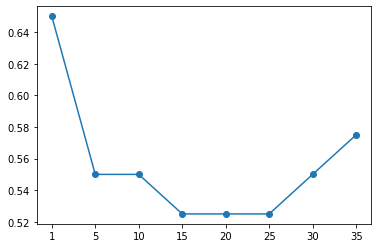

In [15]:
plt.plot(k_value, accuracy, 'o-')   # X轴：参数范围，Y轴：准确率，绘图类型（点+实线）
plt.show()

# AUC

In [19]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier(n_neighbors=1) # k=1 创建一个KNN算法实例，n_neighbors默认为1,后续通过网格搜索获取最优参数
knn.fit(X_train, y_train) # 将测试集送入算法
y_predict = knn.predict(X_test) # 获取预测结果
y_score = knn.predict_proba(X_test)

auc_score2 = roc_auc_score(y_test,y_predict)
print(auc_score2)

0.7250000000000001


<ipython-input-19-0a90041c3090>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train) # 将测试集送入算法


# recall 灵敏度？召回

In [69]:
from sklearn.metrics import recall_score

y_pred = y_predict
y_true = y_test
print(recall_score(y_true, y_pred, average='macro'))  # 
print(recall_score(y_true, y_pred, average='micro'))  # 
print(recall_score(y_true, y_pred, average='weighted'))  # 
print(recall_score(y_true, y_pred, average=None))  # 

0.7250000000000001
0.725
0.725
[0.65 0.8 ]


# F-score

In [70]:
from sklearn.metrics import f1_score

y_pred = y_predict
y_true = y_test
print(f1_score(y_true, y_pred, average='macro'))  # 0.26515151515151514
print(f1_score(y_true, y_pred, average='micro'))  # 0.26666666666666666
print(f1_score(y_true, y_pred, average='weighted'))  # 0.26590909090909093
print(f1_score(y_true, y_pred, average=None))  # [0.27272727 0.27272727 0.25      ]

0.7234443746071653
0.7250000000000001
0.7234443746071653
[0.7027027  0.74418605]


# #Normalization max-min

[[0.61904762 0.         0.         1.         0.13980247]
 [0.4047619  1.         1.         0.5        0.70249062]
 [0.52380952 0.         1.         0.5        0.35149524]
 [0.76190476 0.         0.         0.         0.44038917]
 [0.57142857 1.         0.         0.5        0.42650446]
 [0.76190476 1.         1.         0.5        0.03064465]
 [0.23809524 1.         1.         1.         0.10392084]
 [0.42857143 1.         0.         1.         0.09681499]
 [0.64285714 1.         1.         0.5        0.17171015]
 [0.69047619 0.         1.         0.5        0.01175934]
 [0.21428571 1.         1.         0.5        0.03814551]
 [0.64285714 1.         1.         0.5        0.59964307]
 [0.5952381  1.         1.         1.         0.04590262]
 [0.47619048 1.         0.         0.         0.11570805]
 [0.4047619  0.         0.         1.         0.26689486]
 [0.57142857 1.         0.         1.         0.04697965]
 [0.61904762 1.         1.         0.5        0.45498403]
 [0.33333333 1

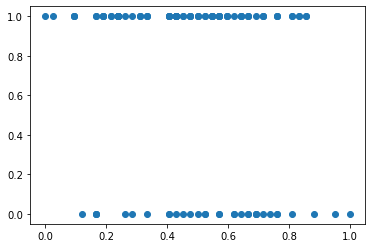

In [71]:
from sklearn.preprocessing import MinMaxScaler
#归一化(normalization)
minMax = MinMaxScaler()
x_std = minMax.fit_transform(X_train)
print(x_std)
plt.scatter(x_std[:,0],x_std[:,1])
plt.show()